<a href="https://colab.research.google.com/github/tennissta99660/Linear_regression_apple_stock/blob/main/Linear_regression_apple_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# load the dataset
data_path = "Apple_stock_data_10years.csv"
apple_data = pd.read_csv(data_path)

# select features/column and target
X = apple_data[['open', 'high', 'low', 'volume']].values
y = apple_data[['close']].values

# scale the features to range [0, 1], each column is being scaled to [0,1] with highest to 1 and lowest to 0 and everything else between.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initialize random weights and bias
num_features = X_train.shape[1]
weights = {
    'W': np.random.randn(num_features, 1),
    'B': np.random.randn(1, 1)
}

def forward_linear_regression(X_batch: np.ndarray, y_batch: np.ndarray, weights: dict) -> tuple:
    N = np.dot(X_batch, weights['W'])
    P = N + weights['B']
    loss = np.mean(np.power(y_batch - P, 2))
    forward_info = {'X': X_batch, 'N': N, 'P': P, 'y': y_batch}
    return loss, forward_info

def loss_gradients(forward_info: dict, weights: dict) -> dict:
    batch_size = forward_info['X'].shape[0]
    dLdP = -2 * (forward_info['y'] - forward_info['P'])
    dLdW = np.dot(forward_info['X'].T, dLdP) / batch_size
    dLdB = np.sum(dLdP) / batch_size
    loss_grads = {'W': dLdW, 'B': dLdB}
    return loss_grads

# training parameters
learning_rate = 0.001
batch_size = 32
num_epochs = 1000
num_samples = X_train.shape[0]

# training loop
for epoch in range(num_epochs):
    indices = np.random.permutation(num_samples)
    X_shuffled, y_shuffled = X_train[indices], y_train[indices]

    for i in range(0, num_samples, batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        y_batch = y_shuffled[i:i + batch_size]

        # forward pass
        loss, forward_info = forward_linear_regression(X_batch, y_batch, weights)

        # backward pass
        loss_grads = loss_gradients(forward_info, weights)

        # update weights
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    # printng loss occasionaly
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# learned weights and bias
print("Trained Weights:", weights['W'].flatten())
print("Trained Bias:", weights['B'][0][0])


[[0.73902058 0.74030965 0.71769061 0.06376998]
 [0.74200023 0.74063689 0.74008181 0.03432726]
 [0.75013515 0.74643376 0.74805156 0.02148254]
 ...
 [0.00668245 0.00632466 0.00700057 0.32296772]
 [0.00318255 0.00484179 0.00485206 0.27596504]
 [0.00309458 0.00279185 0.00419455 0.28478721]]
Epoch 0, Loss: 11477.4095
Epoch 100, Loss: 39.5361
Epoch 200, Loss: 7.1590
Epoch 300, Loss: 2.8289
Epoch 400, Loss: 2.4363
Epoch 500, Loss: 1.0474
Epoch 600, Loss: 2.4527
Epoch 700, Loss: 2.5017
Epoch 800, Loss: 1.4715
Epoch 900, Loss: 0.6245
Trained Weights: [69.48943146 70.62788154 69.48151575 -6.61413269]
Trained Bias: 21.264736682564614


In [14]:
#  model on the test set
test_loss, test_info = forward_linear_regression(X_test, y_test, weights)

# compute MSE and MAE
y_pred = test_info['P']
mse = np.mean(np.square(y_test - y_pred))
mae = np.mean(np.abs(y_test - y_pred))

print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')


Test MSE: 1.0114
Test MAE: 0.7395


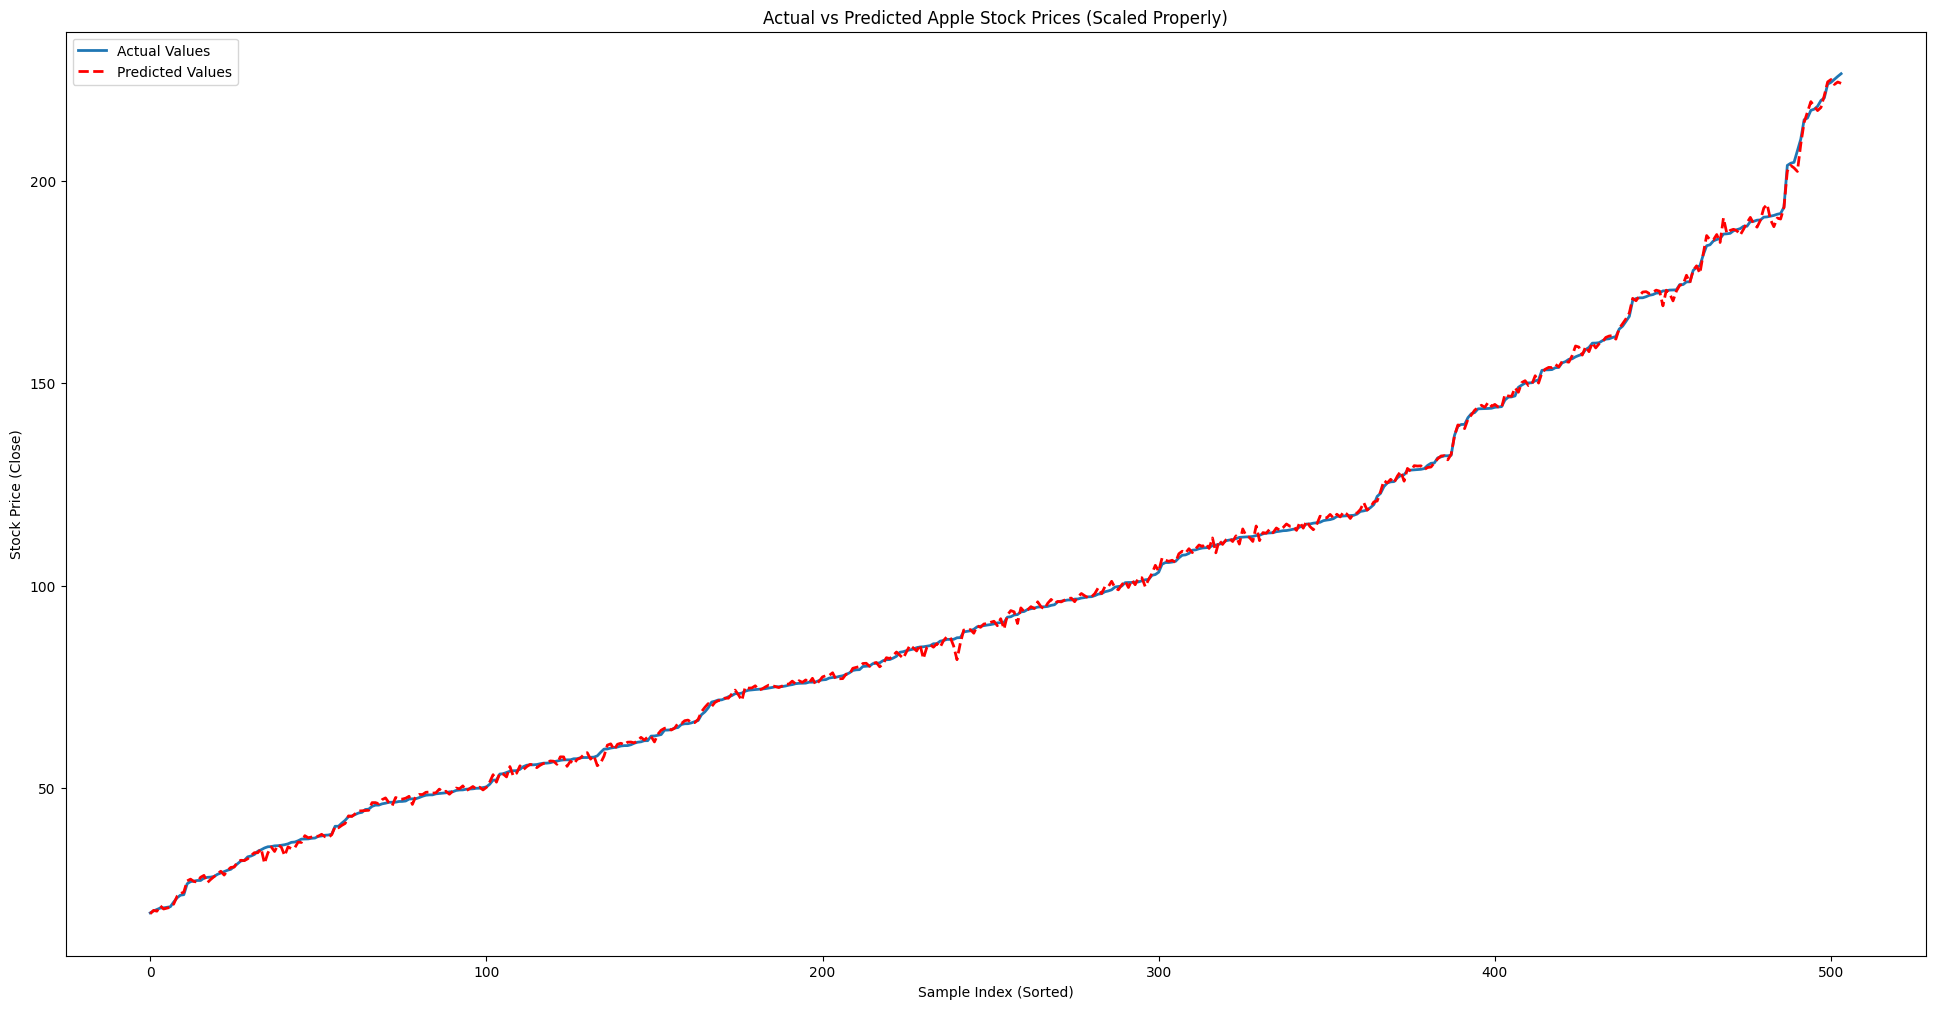

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
# Flatten and sort the values by index
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Sort based on indices to make it appear as a line
sorted_indices = np.argsort(y_test_flat)
y_test_sorted = y_test_flat[sorted_indices]
y_pred_sorted = y_pred_flat[sorted_indices]

# Plot actual vs. predicted with proper scale
plt.figure(figsize=(24, 12))
plt.plot(y_test_sorted, label='Actual Values', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted Values', linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Apple Stock Prices (Scaled Properly)')
plt.xlabel('Sample Index (Sorted)')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()
